<a href="https://colab.research.google.com/github/qowngus33/captcha_recognition/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
%matplotlib inline 
import matplotlib.pyplot as plt
import os
print(os.listdir("sample_data/samples/"))

# Any results you write to the current directory are saved as output.

['gxxpf.png', 'x7746.png', 'enn7n.png', 'yd38e.png', 'nwg2m.png', '3den6.png', '7dgc2.png', 'gw468.png', 'cgcgb.png', 'men4f.png', 'n8fp6.png', '6e2dg.png', '2p2y8.png', 'cd6p4.png', 'egxmp.png', 'yw667.png', 'wddcp.png', 'pm47f.png', 'defyx.png', 'nnf8b.png', 'ne325.png', '5dxnm.png', 'bgd4m.png', 'f4wfn.png', '7pn5g.png', 'fg38b.png', '5gcd3.png', 'xw465.png', 'gy5bf.png', 'ffpxf.png', '2enf4.png', '8n34n.png', '8gmc4.png', '2bg48.png', 'y2ye8.png', '677g3.png', 'gf2g4.png', 'm5ym2.png', '8n5pn.png', 'cnex4.png', '72m6f.png', 'cc845.png', 'pdw38.png', 'xgcxy.png', 'ppx77.png', 'fnbfw.png', '7p852.png', 'ng46m.png', '244e2.png', 'xyncc.png', 'fp762.png', 'g247w.png', 'gegw4.png', '2wx73.png', '42dw4.png', 'gfp54.png', 'pw5nc.png', 'x6pdb.png', '57gnx.png', 'x4f7g.png', 'nb267.png', '6cm6m.png', '6fgdw.png', '3x5fm.png', '6ge3p.png', 'pmd3w.png', 'dnne7.png', 'enpw2.png', 'wm47f.png', 'fc6xb.png', 'ddcdd.png', 'nybcx.png', 'c5xne.png', 'feyc8.png', 'xfgxb.png', '5mfff.png', '7m8px.png'

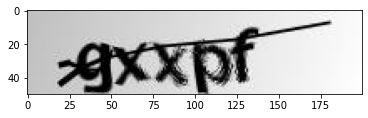

In [36]:
import matplotlib.image as img
import matplotlib.pyplot as plt

fileName = "sample_data/samples/gxxpf.png"

ndarray = img.imread(fileName)

plt.imshow(ndarray)
plt.show()

In [3]:
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import os
import cv2
import string
import numpy as np

#Init main values
symbols = string.ascii_lowercase + "0123456789" # All symbols captcha can contain
num_symbols = len(symbols)
img_shape = (50, 200, 1)

In [4]:
print(num_symbols)

36


In [5]:
def create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(5):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    model = Model(img, outs)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [114]:
def preprocess_data():
    n_samples = len(os.listdir('sample_data/samples'))
    X = np.zeros((n_samples, 50, 200, 1)) #1070*50*200
    y = np.zeros((5, n_samples, num_symbols)) #5*1070*36

    for i, pic in enumerate(os.listdir('sample_data/samples')):
        # Read image as grayscale
        img = cv2.imread(os.path.join('sample_data/samples', pic), cv2.IMREAD_GRAYSCALE)
        pic_target = pic[:-4]
        if len(pic_target) < 6:
            # Scale and reshape image
            img = img / 255.0
            print(img.shape)
            img = np.reshape(img, (50, 200, 1))
            # Define targets and code them using OneHotEncoding
            targs = np.zeros((5, num_symbols))
            for j, l in enumerate(pic_target):
                ind = symbols.find(l)
                targs[j, ind] = 1
            X[i] = img
            y[:, i] = targs
    
    # Return final data
    return X, y

X, y = preprocess_data()
print(X.shape)
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)
(50, 200)


In [25]:
model=create_model();
model.summary();

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 50, 200, 16)  160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 25, 100, 16)  0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 25, 100, 32)  4640        ['max_pooling2d[0][0]']      

In [51]:
#model = create_model()
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=100,verbose=1, validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 8s 322ms/step - loss: 3.4500 - dense_1_loss: 0.5235 - dense_3_loss: 0.2975 - dense_5_loss: 0.6830 - dense_7_loss: 1.0505 - dense_9_loss: 0.8953 - dense_1_accuracy: 0.8093 - dense_3_accuracy: 0.8995 - dense_5_accuracy: 0.7345 - dense_7_accuracy: 0.6211 - dense_9_accuracy: 0.6740 - val_loss: 2.8906 - val_dense_1_loss: 0.1287 - val_dense_3_loss: 0.3940 - val_dense_5_loss: 0.7722 - val_dense_7_loss: 0.8601 - val_dense_9_loss: 0.7356 - val_dense_1_accuracy: 0.9536 - val_dense_3_accuracy: 0.9021 - val_dense_5_accuracy: 0.7938 - val_dense_7_accuracy: 0.7835 - val_dense_9_accuracy: 0.8299
Epoch 2/100
25/25 [==============================] - 8s 306ms/step - loss: 3.3284 - dense_1_loss: 0.4956 - dense_3_loss: 0.3163 - dense_5_loss: 0.6134 - dense_7_loss: 1.0452 - dense_9_loss: 0.8580 - dense_1_accuracy: 0.8222 - dense_3_accuracy: 0.8776 - dense_5_accuracy: 0.7539 - dense_7_accuracy: 0.6057 - dense_9_accuracy: 0.6727 - val_loss: 2.6479 - val_de

In [96]:
# Define function to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = img / 255.0
    else:
        print("Not detected");
    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    ans = np.reshape(res, (5, 36))
    l_ind = []
    probs = []
    for a in ans:
        l_ind.append(np.argmax(a))
        #probs.append(np.max(a))

    capt = ''
    for l in l_ind:
        capt += symbols[l]
    return capt#, sum(probs) / 5

In [97]:
def predict_x(img):
    img = np.reshape(img, (1, 50, 200, 1))
    res = np.array(model.predict(img))
    ans = np.reshape(res, (5, 36))
    l_ind = []
    probs = []
    for a in ans:
        l_ind.append(np.argmax(a))
        #probs.append(np.max(a))

    capt = ''
    for l in l_ind:
        capt += symbols[l]
    return capt#, sum(probs) / 5

In [109]:
def print_y(y_list):
  result = ""
  for y in y_list:
    for i in range(len(y)):
      if int(y[i]) == 1:
        result += symbols[i]
  return result

In [53]:
score = model.evaluate(X_test,[y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]],verbose=1)
print('Test Loss and accuracy:')
print(score)

4/4 [==============================] - 0s 102ms/step - loss: 2.7530 - dense_1_loss: 0.0016 - dense_3_loss: 0.5266 - dense_5_loss: 0.9421 - dense_7_loss: 0.8146 - dense_9_loss: 0.4681 - dense_1_accuracy: 1.0000 - dense_3_accuracy: 0.9394 - dense_5_accuracy: 0.8384 - dense_7_accuracy: 0.8384 - dense_9_accuracy: 0.8990
Test Loss and accuracy:
[2.7529640197753906, 0.001561307697556913, 0.5265591740608215, 0.94210284948349, 0.8146332502365112, 0.46810731291770935, 1.0, 0.939393937587738, 0.8383838534355164, 0.8383838534355164, 0.8989899158477783]


In [113]:
# Check model on some samples
# model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])

print(predict('sample_data/samples/xf4p4.png'))
count = 0
for i in range(len(X_test)):
  if predict_x(X_test[i]) != print_y([y_test[0][i], y_test[1][i], y_test[2][i], y_test[3][i], y_test[4][i]]):
    count += 1
print(len(X_test)-count/len(X_test))

1/1 [==============================] - 0s 50ms/step
xf4md
1/1 [==============================] - 0s 28ms/step
98.15151515151516


In [ ]:
#Lets test an unknown captcha
#preview
%matplotlib inline 
import matplotlib.pyplot as plt
img=cv2.imread('../input/captcha/capthaimage/capthaimages/a.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))